In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\L.RAMYA\Downloads\Google_Stock_Price_Train.csv")
df

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [3]:
training_set =df.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# FEATURE SCALING

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
training_set.shape

(1258, 1)

In [5]:
# creating a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [7]:
# reshaping

In [8]:

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [9]:
# building and training the rnn
#importing the keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
# initialising the rnn

In [12]:
regressor = Sequential()

In [13]:
# adding the first LSTM layer and some dropout regularisation

In [14]:
regressor.add(LSTM(units=50,return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [15]:
# adding the second LSTM layer and some dropout regularisation

In [16]:
regressor.add(LSTM(units=50,return_sequences= True))
regressor.add(Dropout(0.2))

In [17]:
# adding the third LSTM layer and some dropout regularisation

In [18]:
regressor.add(LSTM(units=50,return_sequences= True))
regressor.add(Dropout(0.2))

In [19]:
# adding the fourth LSTM layer and some dropout regularisation

In [20]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [21]:
# adding the output layer

In [22]:
regressor.add(Dense(units=1))

In [23]:
# compiling the rnn

In [24]:
regressor.compile(optimizer = 'adam',loss= "mean_squared_error")

In [25]:
# fitting the RNN to the Training set

In [26]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 162ms/step - loss: 0.1072
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0063
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0055
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0052
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0044
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.0047
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0053
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0043
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0044
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 0.0040
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - loss: 0.0043
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0036
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s

In [27]:
pred = regressor.predict(X_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step


In [28]:
# evaluating the rnn

In [29]:
import math
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train,pred))
rmse

0.023970636420664423

In [30]:
# gettting the real stock price of 2017

In [31]:
df1 = pd.read_csv(r"C:\Users\L.RAMYA\Downloads\Google_Stock_Price_Test.csv")
df1
real_stock_price = df1.iloc[:,1:2].values

In [32]:
# getting the predicted stock price of 2017

In [34]:
dataset_total = pd.concat((df['Open'],df1['Open']),axis=0)

inputs = dataset_total[len(dataset_total)-len(df1)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


**Visualising the Result**

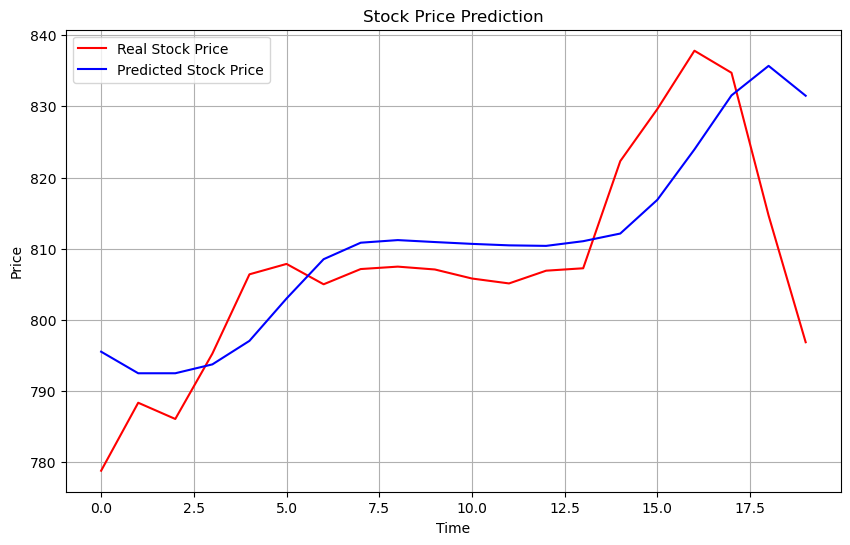

In [35]:
import matplotlib.pyplot as plt

# Match dimensions
real_stock_price = df1['Open'].values[-len(predicted_stock_price):]
predicted_stock_price = predicted_stock_price.flatten()

plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
